In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("Betelguese_120days_Cleaned.csv")

df.head()

,Unnamed: 0,Visual Magnitude,Days before today
0,0.0,1.624000,0.0
1,1.0,1.596875,1.0
2,2.0,1.562083,2.0
3,3.0,1.629412,3.0
4,4.0,1.615000,4.0


In [6]:
data = df["Visual Magnitude"]

type(data)

pandas.core.series.Series

In [7]:
data = np.flipud(data) 

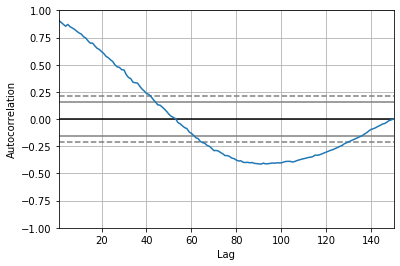

In [12]:
autocorrelation_plot(data)
plt.show()

In [25]:
# fit model
model = ARIMA(data, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  149
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  95.543
Method:                       css-mle   S.D. of innovations              0.127
Date:                Thu, 20 Feb 2020   AIC                           -177.086
Time:                        18:35:44   BIC                           -156.059
Sample:                             1   HQIC                          -168.543
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0066      0.003      2.243      0.026       0.001       0.012
ar.L1.D.y     -0.7563      0.081     -9.330      0.000      -0.915      -0.597
ar.L2.D.y     -0.6146      0.094     -6.523      0.0

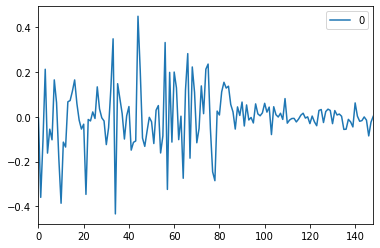

In [26]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

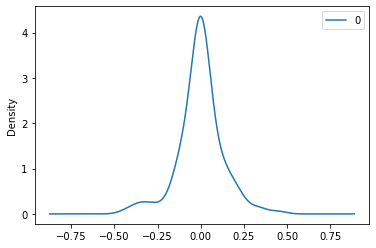

In [27]:
residuals.plot(kind='kde')

In [21]:
print(residuals.describe())

                0
count  149.000000
mean    -0.002652
std      0.123619
min     -0.415747
25%     -0.048822
50%      0.001341
75%      0.044647
max      0.364687


In [29]:
X = pd.Series(data).values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=1.323887, expected=1.326522
predicted=1.323407, expected=1.339268
predicted=1.328627, expected=1.386923
predicted=1.366724, expected=1.385152
predicted=1.381384, expected=1.421905
predicted=1.390511, expected=1.308095
predicted=1.371058, expected=1.413871
predicted=1.402548, expected=1.409333
predicted=1.415506, expected=1.411667
predicted=1.434643, expected=1.447778
predicted=1.413279, expected=1.398500
predicted=1.421725, expected=1.500500
predicted=1.460632, expected=1.428929
predicted=1.453999, expected=1.436111
predicted=1.465807, expected=1.455278
predicted=1.456502, expected=1.446667
predicted=1.482574, expected=1.456818
predicted=1.479027, expected=1.466471
predicted=1.472006, expected=1.476842
predicted=1.484446, expected=1.497917
predicted=1.492576, expected=1.484286
predicted=1.495152, expected=1.492500
predicted=1.502155, expected=1.469268
predicted=1.501824, expected=1.502857
predicted=1.516126, expected=1.491538
predicted=1.515278, expected=1.473333
predicted=1.